Queuing theory: Models the necessary resources needed to allocate for a service.       

Components:
1. Arrival time
2. Service time
3. No of resources


Problem: Identify whether there is a need of another cashier for the operations of small grocery store. Customer comes to the cashier with an exponential arrival time of 1 minute. The customer tend to finish checking out with a mean of 1 minute and standard deviation of 0.2 minute. Will 1 cashier suffice if waiting time is less than two minutes

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Defining the problem with variables
lambda_inter_arrival_time = 1
mu_service_time = 1
service_time_sd = 0.2

In [20]:
# Defining a function to calculate waiting time
def waiting_time(mean_inter_arrival, mean_service, service_sd):

  # Simulating arrival time and service time
  arr_time = np.random.exponential(mean_inter_arrival, 400).cumsum()
  serv_time = np.random.normal(mean_service, service_sd, 400)
  waiting_time = []
  leaving_time = []
  waiting_time.append(0)
  leaving_time.append(arr_time[0] + serv_time[0])
  for i in range (1, len(arr_time)):
    waiting_time.append(max(0, leaving_time[i - 1] - arr_time[i]))
    leaving_time.append(arr_time[i] + serv_time[i] + waiting_time[i])
  mean_waiting_time = np.mean(waiting_time)
  return mean_waiting_time

In [24]:
waiting_time(lambda_inter_arrival_time, mu_service_time, service_time_sd)

13.454516368716945

Now this result varies as the random values of exponential and normal distribution changes. To get some concrete insight about the waiting time, we will find the mean waiting time for a large number of iterations.

In [2]:
def avg_simultaion(mean_inter_arrival, mean_service, service_sd):
  sim_waiting = []
  for i in range (1000):
    # Simulating arrival time and service time
    arr_time = np.random.exponential(mean_inter_arrival, 400).cumsum()
    serv_time = np.random.normal(mean_service, service_sd, 400)
    waiting_time = []
    leaving_time = []
    waiting_time.append(0)
    leaving_time.append(arr_time[0] + serv_time[0])
    for i in range (1, len(arr_time)):
      waiting_time.append(max(0, leaving_time[i - 1] - arr_time[i]))
      leaving_time.append(arr_time[i] + serv_time[i] + waiting_time[i])
    mean_waiting_time = np.mean(waiting_time)
    sim_waiting.append((mean_waiting_time))
  return(sim_waiting)

In [41]:
np.mean(avg_simultaion(lambda_inter_arrival_time, mu_service_time, service_time_sd))

10.03387047991515

In [43]:
np.median(avg_simultaion(lambda_inter_arrival_time, mu_service_time, service_time_sd))

8.333484187151697

(array([222., 313., 195., 127.,  66.,  37.,  27.,  10.,   0.,   3.]),
 array([ 2.08697132,  5.59463078,  9.10229023, 12.60994969, 16.11760914,
        19.6252686 , 23.13292805, 26.64058751, 30.14824696, 33.65590642,
        37.16356587]),
 <a list of 10 Patch objects>)

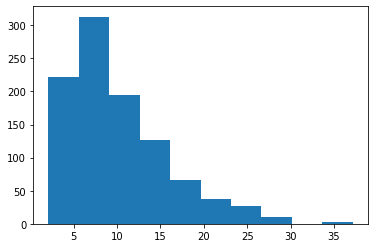

In [42]:
plt.hist(avg_simultaion(lambda_inter_arrival_time, mu_service_time, service_time_sd))

From large number of iterations we find that the average waiting time is around 10 minutes. However the graph is right skewed and the median/mode lies near 8. So the waiting time for the given conditions is around 8 minutes which is quite high. Hence, 1 cashier is not enough for the seamless operations of the grocery store.